In [1451]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 

# Carga

In [1452]:
## Importando os datasets com suas respectivas configurações

In [1453]:
vixCasa = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixCasas.csv' , encoding='utf-16', sep='|')

In [1454]:
vixApp = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixApartamentos.csv' , encoding='utf-16', sep='|')

In [1455]:
## Unindo os dados de Apartamentos e Casas
df = pd.concat([vixCasa, vixApp], ignore_index=True)

In [1456]:
# Removemos a coluna codigo da olx pois não será importante para a análise. Além disso, fizemos alguns tratamentos nos nomes de alguns bairros
df = df.drop_duplicates(subset=(['Codigo']))
df['Bairro'] = df['Bairro'].map(lambda x : str.strip(x))
df['Bairro'] = df['Bairro'].replace(['São Pedro V'], ['São Pedro'])
df['Bairro'] = df['Bairro'].replace(['Comdusa'], ['Condusa'])

In [1457]:
# Nesse bloco, carregamos o dataset com indices de alfabetização e salario meio por bairro na cidade de vitória.
# Além disso, foi feito algumas tratativas nos nomes dos bairros.
df_social_columns = ['bairro' , 'p+10' , 'p+10_alfabetizadas' ,'taxa_alfabetizacao'  , 'salarioMedio' ,'taxa-1salario' , 'taxa+1salario' , 'taxasemsalario' ]
df_social = pd.read_csv(r"C:\Users\arthu\OneDrive\Projetos\0-GitHub\projetoDataScienceFaesa\Extracoes\ijsn-censo\alfabetizacaoRendimento2010.csv" )
df_social.columns = df_social_columns
df_social = df_social[df_social['bairro'] != 'Vitória']
df_social['bairro'] = df_social['bairro'].map(lambda x : str.strip(x))
df_social['bairro'] = df_social['bairro'].replace(['Jardim Camburí'],['Jardim Camburi'])
df_social['bairro'] = df_social['bairro'].replace(['Morada de Camburí'],['Morada de Camburi'])
df_social['bairro'] = df_social['bairro'].replace(['Pontal de Camburí'],['Pontal de Camburi'])
df_social['bairro'] = df_social['bairro'].replace(['Republica'], ['República'])
df_social['bairro'] = df_social['bairro'].replace(['Santa Lucia'], ['Santa Lúcia'])
df_social['bairro'] = df_social['bairro'].replace(['Da Penha'], ['da Penha'])
df_social['bairro'] = df_social['bairro'].replace(['De Lourdes'], ['de Lourdes'])
df_social['bairro'] = df_social['bairro'].replace(['Do Moscoso'], ['do Moscoso'])
df_social['bairro'] = df_social['bairro'].replace(['São Cristovão'], ['São Cristóvão'])
df_social['bairro'] = df_social['bairro'].replace(['Antonio Honório'], ['Antônio Honório'])
df_social['Populacao'] = df_social['p+10' ] / 288311


In [1458]:
# Foi realizado um merge com os datasets da OLX e dos indices.
temp = df_social[['bairro' ,'taxa_alfabetizacao', 'salarioMedio' , 'taxa+1salario' ,'taxa-1salario']].rename(columns={'bairro' : 'Bairro'})
df = df.merge(temp , on='Bairro' )

# Tratamento de dados

In [1459]:
df 

,Codigo,Descricao,Link,Page,Valor,Categoria,Tipo,Área construída,Quartos,Banheiros,...,Logradouro,Detalhes do imóvel,Condomínio,IPTU,Detalhes do condominio,Área útil,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario
0,980712935,"Vendo casa emITARARÉ ,VITÓRIA -ES",https://es.olx.com.br/norte-do-espirito-santo/...,1,R$ 150.000,Casas,Venda - casa em rua pública,110m²,3,2,...,Alameda Enalva Veloso de Almeida,NaN,NaN,NaN,NaN,NaN,95.25,"1,015.74",44.54,21.76
1,980709362,"Vendo casa em ITARARÉ , Vitória -ES",https://es.olx.com.br/norte-do-espirito-santo/...,1,R$ 150.000,Casas,Venda - casa em rua pública,125m²,2,2,...,Alameda Enalva Veloso de Almeida,NaN,NaN,NaN,NaN,NaN,95.25,"1,015.74",44.54,21.76
2,980457427,"Vendo casa em ITARARÉ,Vitória-ES",https://es.olx.com.br/norte-do-espirito-santo/...,2,R$ 150.000,Casas,Venda - casa em rua pública,115m²,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,95.25,"1,015.74",44.54,21.76
3,980452191,Casa para venda com 3 quartos em Itararé - Vit...,https://es.olx.com.br/norte-do-espirito-santo/...,2,R$ 150.000,Casas,Venda - casa em rua pública,100m²,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,95.25,"1,015.74",44.54,21.76
4,980431423,Compre sua casa em Itararé - Vitória - N°12 -...,https://es.olx.com.br/norte-do-espirito-santo/...,2,R$ 190.000,Casas,Venda - casa em rua pública,100m²,2,1,...,Alameda Enalva Veloso de Almeida,NaN,NaN,NaN,NaN,NaN,95.25,"1,015.74",44.54,21.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393,959543770,Vendo casa 60.000,https://es.olx.com.br/norte-do-espirito-santo/...,42,R$ 60.000,Casas,Venda - casa em rua pública,100m²,3,1,...,NaN,Área de serviço,NaN,NaN,NaN,NaN,93.77,910.76,34.11,27.61
7394,959505271,Vendo,https://es.olx.com.br/norte-do-espirito-santo/...,42,R$ 32.000,Casas,Venda - casa em rua pública,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,93.77,910.76,34.11,27.61
7395,962033062,Ilha de Okinawa Residênce,https://es.olx.com.br/norte-do-espirito-santo/...,100,R$ 26.000,Apartamentos,Venda - apartamento padrão,NaN,2,2,...,NaN,"Área de serviço, Churrasqueira, Varanda, Acade...",R$ 0,R$ 0,"Elevador, Segurança 24h, Portaria, Permitido a...",58m²,93.77,910.76,34.11,27.61
7396,940058942,Apartamento com 1 dormitório à venda em Vitória,https://es.olx.com.br/norte-do-espirito-santo/...,87,R$ 110.000,Apartamentos,Venda - apartamento padrão,NaN,1,1,...,Rua Henrique Martins Tuche,NaN,R$ 120,R$ 0,NaN,38m²,98.22,"1,681.78",58.61,15.05


### Alterando tipo de dados

In [1460]:
# Necessario fazer algumas transformações nos dados para tranforma em float
df['Valor']= df['Valor'].map(lambda x : str(x).replace('R$ ','').replace('.','')).astype(float)

In [1461]:
# também em relação a área, observamos que os dados eram preenchidos ou na coluna Area Util ou Area Construida. Dessa forma utilizamos o isnull para utilizar a area construida caso não tenhamos area Util.
df['Área útil'] =  df['Área útil'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Área construída'] = df['Área construída'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Area'] = df['Área útil'].fillna(df['Área construída'])

In [1462]:
## Alguns tratamentos para transformar dados categoricos em dados numericos. Os imoveis com 5 ou mais Quartos, banheiros e vagas foram alterados para ter no máximo 5.
df['Quartos'] = df['Quartos'].map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Banheiros'] = df['Banheiros'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Vagas na garagem'] = df['Vagas na garagem'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))

In [1463]:
# Mais um processo de remoção de colunas que não iremos utilizar
df.drop(['Link','Descricao','Área útil' , 'Área construída', 'Page' ,'Detalhes do imóvel', 'Condomínio', 'IPTU',
       'Detalhes do condominio', 'Logradouro','CEP', 'Município', 'Codigo'] , axis=1, inplace=True)

In [1464]:
# Também julgamos importante remover imoveis sem banheiros ou quartos. Entendemos que sejam erros de preenchimento.
df = df[df['Banheiros'] >0]
df = df[df['Quartos'] >0]

In [1465]:
# Agora sim, nosso dataset está pronto para as demais etapas.
df 

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area
0,"150,000.00",Casas,Venda - casa em rua pública,3,2,1,Itararé,95.25,"1,015.74",44.54,21.76,110.00
1,"150,000.00",Casas,Venda - casa em rua pública,2,2,2,Itararé,95.25,"1,015.74",44.54,21.76,125.00
2,"150,000.00",Casas,Venda - casa em rua pública,2,2,1,Itararé,95.25,"1,015.74",44.54,21.76,115.00
3,"150,000.00",Casas,Venda - casa em rua pública,3,1,1,Itararé,95.25,"1,015.74",44.54,21.76,100.00
4,"190,000.00",Casas,Venda - casa em rua pública,2,1,1,Itararé,95.25,"1,015.74",44.54,21.76,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7393,"60,000.00",Casas,Venda - casa em rua pública,3,1,0,Cruzamento,93.77,910.76,34.11,27.61,100.00
7394,"32,000.00",Casas,Venda - casa em rua pública,2,1,0,Cruzamento,93.77,910.76,34.11,27.61,NaN
7395,"26,000.00",Apartamentos,Venda - apartamento padrão,2,2,1,Cruzamento,93.77,910.76,34.11,27.61,58.00
7396,"110,000.00",Apartamentos,Venda - apartamento padrão,1,1,0,Segurança do Lar,98.22,"1,681.78",58.61,15.05,38.00


### Análise e remoção de outliers

In [1466]:
# Criamos uma função para calcular os limites inferiores e superiores das distribuições
def fncCalculaLimites(x):
    return x.quantile(0.75) + x.std()*1.5 , x.quantile(0.25) - x.std()*1.5 

##### Valor

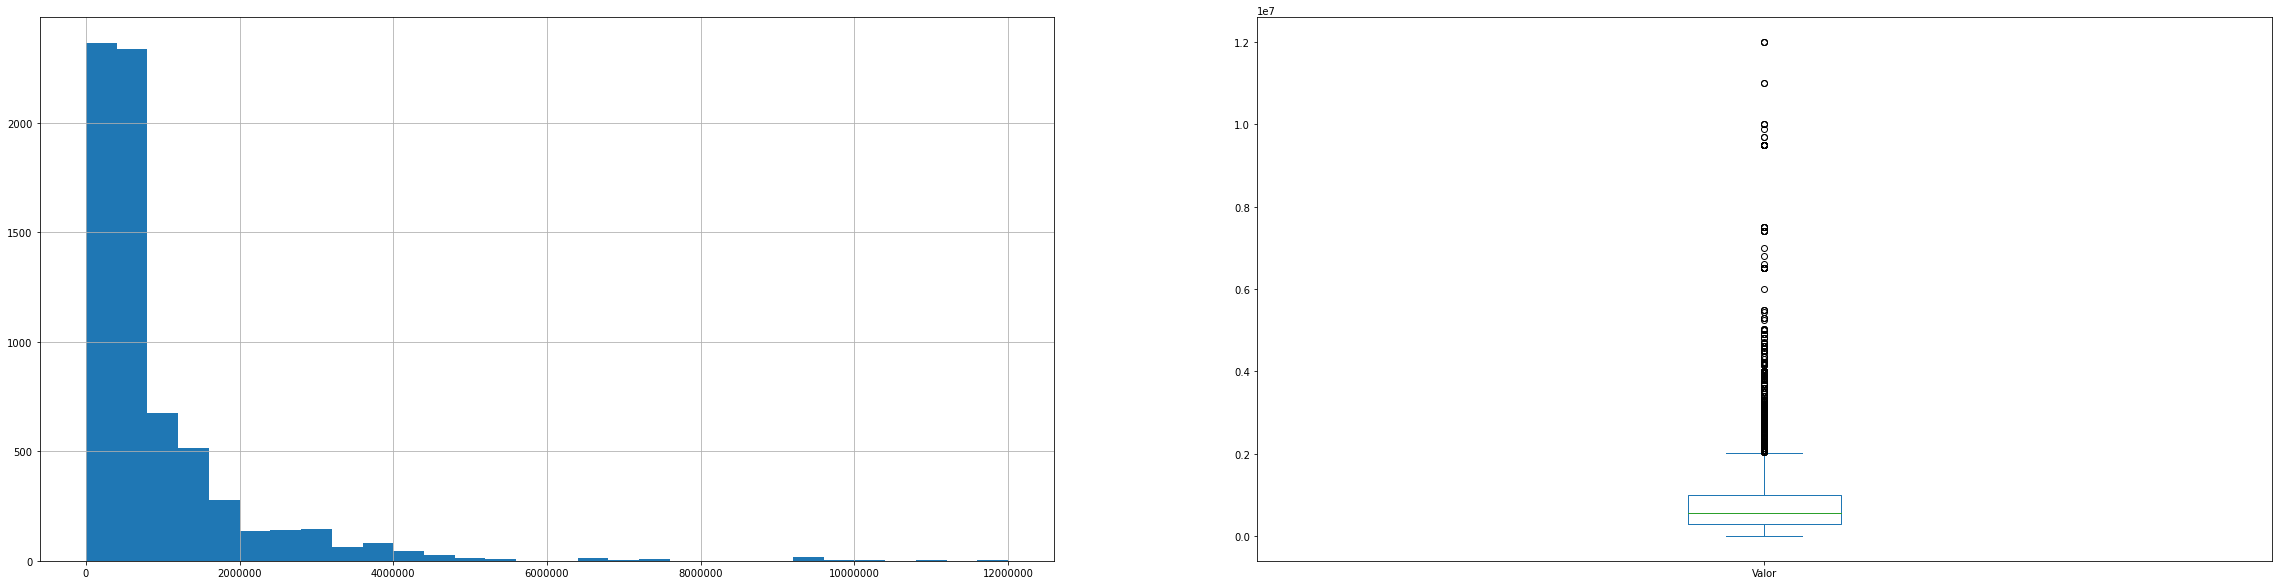

In [1467]:
# Podemos observar que o valor dos apartamentos tem uma distribuição lognormal. Optamos por remover os outliers utilizando uma transformação de log2 na nossa variavel de valor, que é a variavel dependente. 
# É importante fazermos isso por a regressao linear espera que a variavel dependente tenha uma distribuição parecida a gausiana.
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

<AxesSubplot:>

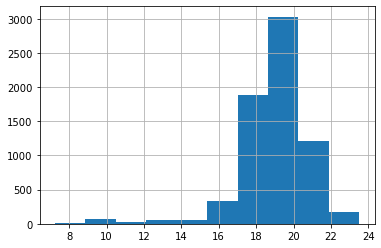

In [1468]:
np.log2(df[df['Valor']>0]['Valor']).hist()

In [1469]:
# Calculo de limites inferiores e superiores
fncCalculaLimites(np.log2(df[df['Valor']>0]['Valor']))

(22.736311478169775, 15.375360496617251)

In [1470]:
# Log 15.37 na base 2 é aproximadamente 42mil
df[df['Valor']<=42000]

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area
38,"5,000.00",Casas,Venda - casa em rua pública,2,1,1,Itararé,95.25,"1,015.74",44.54,21.76,NaN
44,700.00,Casas,Venda - casa em rua pública,3,2,2,Itararé,95.25,"1,015.74",44.54,21.76,390.00
52,500.00,Casas,Venda - casa em rua pública,2,1,2,Itararé,95.25,"1,015.74",44.54,21.76,0.00
53,700.00,Casas,Venda - casa em rua pública,2,1,2,Itararé,95.25,"1,015.74",44.54,21.76,0.00
55,700.00,Casas,Venda - casa em rua pública,3,2,2,Itararé,95.25,"1,015.74",44.54,21.76,350.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7342,"10,000.00",Casas,Venda - casa em rua pública,3,2,2,Redenção,93.18,795.59,36.92,27.86,NaN
7376,650.00,Casas,Venda - casa em rua pública,1,1,0,Vila Rubim,97.25,"1,297.75",48.07,21.09,80.00
7391,"11,000.00",Casas,Venda - casa em rua pública,2,2,1,Nazareth,98.88,"2,121.99",60.75,11.21,0.00
7394,"32,000.00",Casas,Venda - casa em rua pública,2,1,0,Cruzamento,93.77,910.76,34.11,27.61,NaN


In [1471]:
# Removendo outliers
df = df[(df['Valor']>42000) & (df['Valor']<=7000000)]

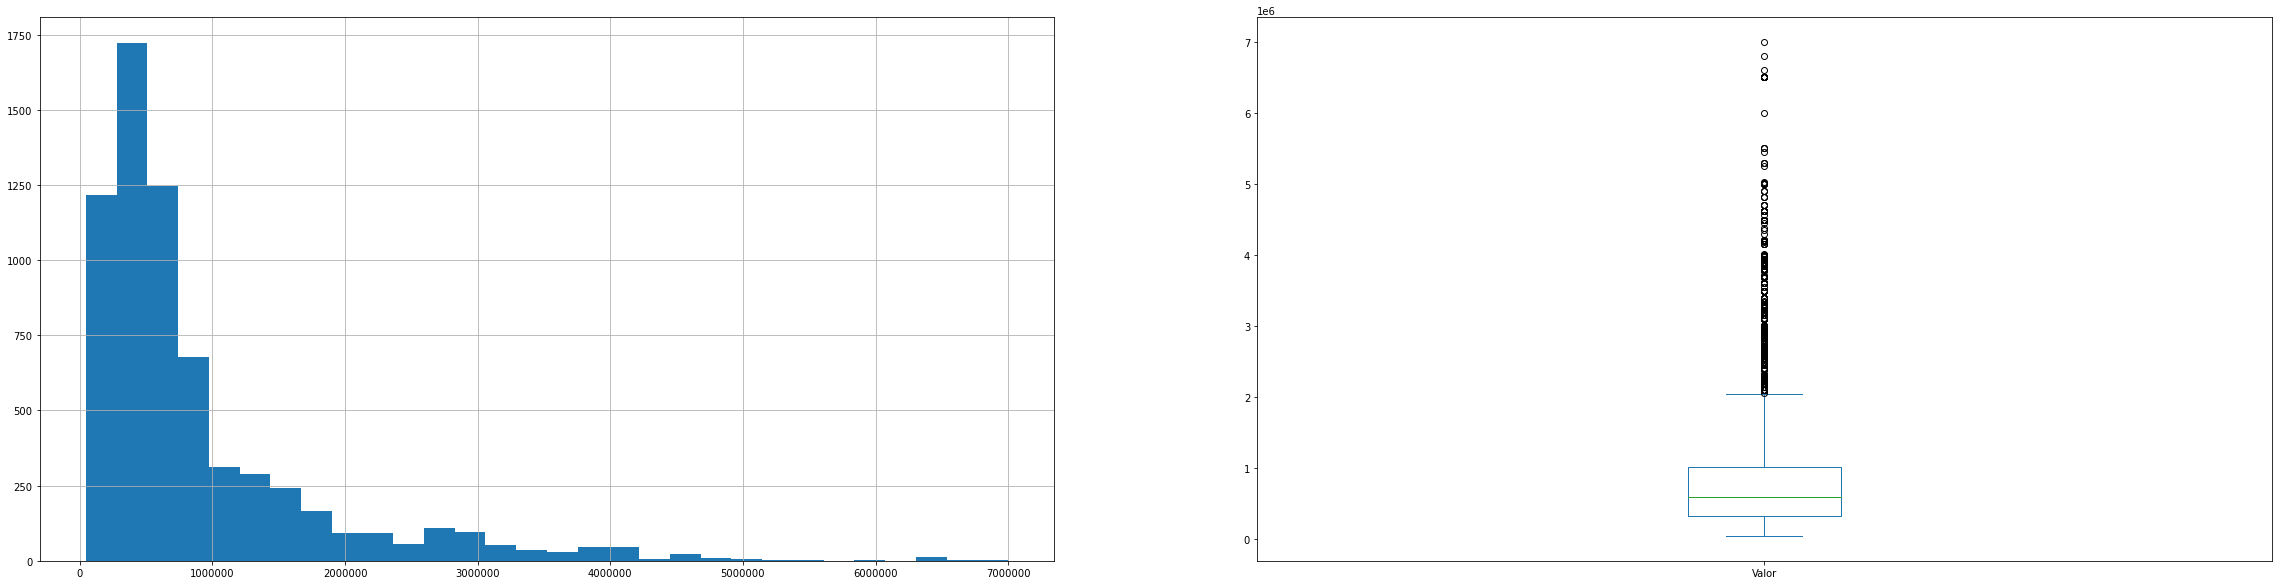

In [1472]:
# Essa é a distribuição dos dados após a remoção dos outliers
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

##### Area

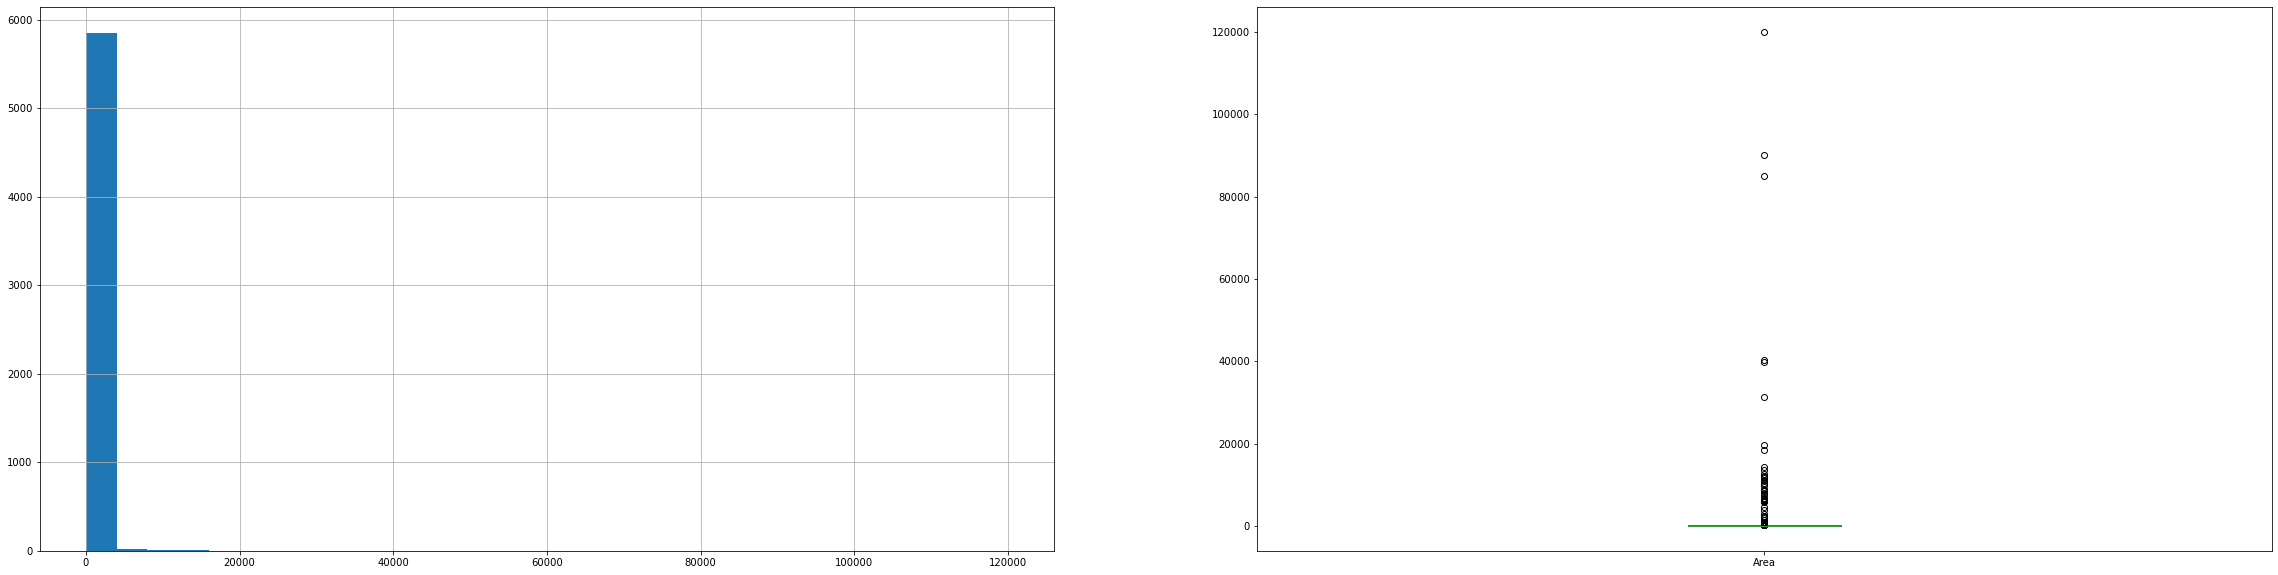

In [1473]:
# Também identificamos dados muito discrepantes na area
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

In [1474]:
# Temos 204 itens com area menores que 30m2  e podemos considerar erros de preenchimento
df[df['Area']<=30]

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area
23,"80,000.00",Casas,Venda - casa em rua pública,2,2,0,Itararé,95.25,"1,015.74",44.54,21.76,0.00
26,"250,000.00",Casas,Venda - casa em rua pública,3,2,1,Itararé,95.25,"1,015.74",44.54,21.76,0.00
27,"250,000.00",Casas,Venda - casa em rua pública,3,2,1,Itararé,95.25,"1,015.74",44.54,21.76,0.00
43,"120,000.00",Casas,Venda - casa em rua pública,2,1,0,Itararé,95.25,"1,015.74",44.54,21.76,0.00
45,"150,000.00",Casas,Venda - casa em rua pública,2,2,0,Itararé,95.25,"1,015.74",44.54,21.76,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7273,"790,000.00",Apartamentos,Venda - apartamento padrão,3,3,2,Barro Vermelho,99.67,"5,419.79",68.36,3.80,0.00
7287,"884,000.00",Apartamentos,Venda - apartamento padrão,3,3,2,Barro Vermelho,99.67,"5,419.79",68.36,3.80,0.00
7327,"779,004.00",Apartamentos,Venda - apartamento padrão,3,2,2,Barro Vermelho,99.67,"5,419.79",68.36,3.80,0.00
7365,"100,000.00",Casas,Venda - casa em rua pública,3,2,0,Forte São João,94.97,"1,134.32",42.61,25.13,0.00


In [1475]:
# Removendo valores com erro de preenchimento
df= df[df['Area']>30]

In [1476]:
# Calculando limites superiores e inferiores
max , min = fncCalculaLimites(df['Area'])
[max, min]

[3989.322230295763, -3754.322230295763]

In [1477]:
# Removendo outliers
max , min = fncCalculaLimites(df['Area'])
df = df[(df['Area'] > min) & (df['Area'] < max)]

In [1478]:
df[((df['Area']>800) & (df['Categoria']=='Casas'))]

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area
189,"6,800,000.00",Casas,Venda - casa em rua pública,4,5,5,Santa Lúcia,99.16,"3,850.42",65.77,6.79,"1,500.00"
2451,"4,000,000.00",Casas,Venda - casa em rua pública,5,5,5,Ilha do Boi,98.24,"7,164.39",61.38,7.06,"1,000.00"
2496,"5,000,000.00",Casas,Venda - casa em rua pública,5,5,5,Ilha do Boi,98.24,"7,164.39",61.38,7.06,890.00
2498,"4,000,000.00",Casas,Venda - casa em rua pública,5,5,5,Ilha do Boi,98.24,"7,164.39",61.38,7.06,"1,000.00"
3207,"220,000.00",Casas,Venda - casa em rua pública,3,2,0,Centro,98.88,"2,393.05",64.23,10.60,818.00
3240,"400,000.00",Casas,Venda - casa em rua pública,3,2,2,Centro,98.88,"2,393.05",64.23,10.60,950.00
3469,"2,980,000.00",Casas,Venda - casa em rua pública,3,4,5,Fradinhos,98.27,"3,009.93",60.16,11.09,847.00
3495,"1,600,000.00",Casas,Venda - casa em rua pública,5,5,4,Fradinhos,98.27,"3,009.93",60.16,11.09,"1,102.00"
3496,"7,000,000.00",Casas,Venda - casa em rua pública,4,3,5,Fradinhos,98.27,"3,009.93",60.16,11.09,"2,300.00"
3656,"3,900,000.00",Casas,Venda - casa em rua pública,5,4,4,Mata da Praia,99.63,"5,986.95",65.09,3.72,840.00


In [1479]:
# Removendo apartamentos com mais de 1000m2. 
# Consideramos como erro de preenchimento
df[((df['Area']>800) & (df['Categoria']=='Apartamentos'))]

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area
1377,"2,895,000.00",Apartamentos,Venda - apartamento cobertura,4,3,3,Jardim Camburi,99.40,"3,066.59",67.44,6.25,"2,413.00"
7033,"366,000.00",Apartamentos,Venda - apartamento padrão,1,1,1,Santa Luíza,99.29,"3,492.87",61.13,8.81,"3,827.00"
7392,"1,200,000.00",Apartamentos,Venda - apartamento padrão,5,5,0,Nazareth,98.88,"2,121.99",60.75,11.21,900.00


In [1480]:
df = df[~((df['Area']>800) & (df['Categoria']=='Apartamentos'))]

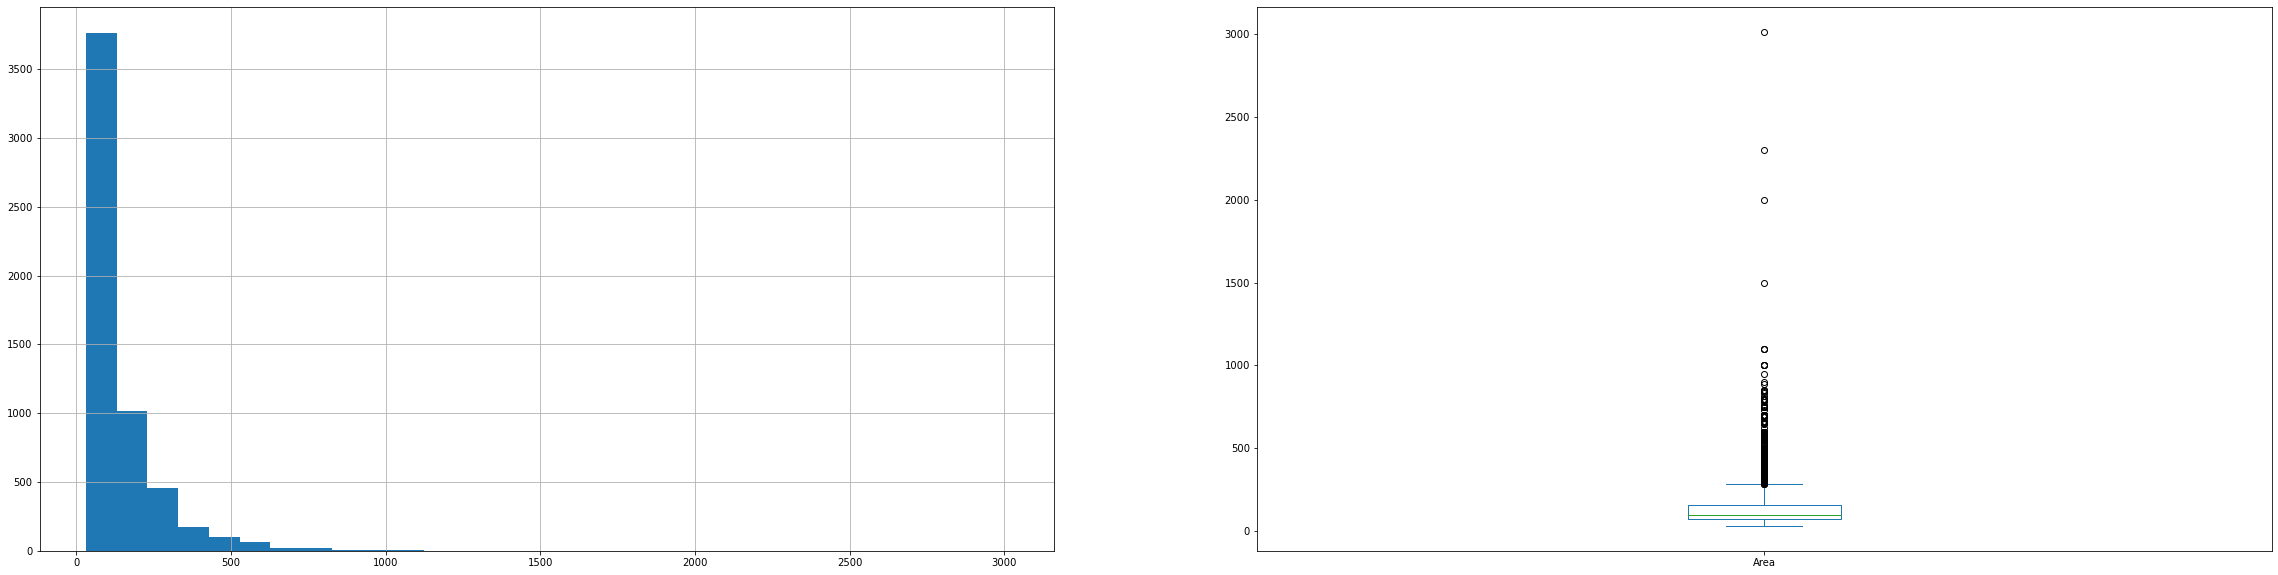

In [1481]:
# Distribuição após remoção de outliers
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

### Campos descritivos

##### Bairros

In [1482]:
df['Bairro'].value_counts()

Jardim Camburi       1779
Jardim da Penha       630
Praia do Canto        539
Mata da Praia         412
Bento Ferreira        356
                     ... 
Estrelinha              1
Mário Cypreste          1
Cruzamento              1
Segurança do Lar        1
Parque Industrial       1
Name: Bairro, Length: 71, dtype: int64

In [1483]:
regioes ={
 'Itararé':  'Maruípe' ,
 'Santa Lúcia':  'Zona Leste' ,
 'Jardim Camburi': 'Jardim Camburi'  ,
 'Goiabeiras':  'Zona Norte' ,
 'Santa Helena':  'Zona Leste' ,
 'Ilha do Boi':   'Zona Leste',
 'Jucutuquara':  'Jucutuquara' ,
 'Praia do Canto': 'Zona Leste'  ,
 'Centro':  'Zona Sul' ,
 'Fradinhos':  'Jucutuquara' ,
 'Mata da Praia': 'Jardim da Penha'  ,
 "Joana D'arc":  'Maruípe' ,
 'Bento Ferreira':  'Jucutuquara' ,
 'de Lourdes':  'Jucutuquara' ,
 'República':  'Jardim da Penha' ,
 'Santa Cecília': 'Maruípe'  ,
 'Morada de Camburi': 'Jardim da Penha'  ,
 'Maruípe': 'Maruípe'  ,
 'Tabuazeiro': 'Maruípe'  ,
 'Maria Ortiz':  'Zona Norte' ,
 'Santo Antônio':  'Santo Antônio' ,
 'Santa Martha':  'Maruípe' ,
 'São Cristóvão':   'Maruípe',
 'Santos Reis': 'Zona Oeste'  ,
 'Enseada do Suá': 'Zona Leste'  ,
 'Santos Dumont':  'Maruípe' ,
 'Jardim da Penha':  'Jardim da Penha' ,
 'Universitário':  'Santo Antônio' ,
 'Solon Borges': 'Zona Norte'  ,
 'Santa Tereza':  'Santo Antônio' ,
 'Ilha do Frade':  'Zona Leste' ,
 'da Penha':  'Maruípe' ,
 'Horto': 'Jucutuquara'  ,
 'Santa Clara':   'Zona Sul',
 'São Pedro':  'Zona Oeste' ,
 'Parque Moscoso':  'Zona Sul'  ,
 'Consolação':  'Jucutuquara' ,
 'São Benedito':  'Maruípe' ,
 'Caratoíra': 'Santo Antônio'  ,
 'Grande Vitória':  'Santo Antônio' ,
 'Jesus de Nazareth': 'Jucutuquara'  ,
 'Romão': 'Jucutuquara'  ,
 'Bonfim':  'Maruípe' ,
 'Praia do Suá': 'Zona Leste'  ,
 'Mário Cypreste': 'Santo Antônio'  ,
 'Jabour': 'Zona Norte'  ,
 'Santa Luíza':  'Zona Leste' ,
 'São José': 'Zona Oeste'  ,
 'Pontal de Camburi': 'Jardim da Penha'  ,
 'Andorinhas':  'Maruípe' ,
 'Nova Palestina':  'Zona Oeste' ,
 'Boa Vista': 'Jardim da Penha'  ,
 'Redenção': 'Zona Oeste'  ,
 'Antônio Honório':  'Zona Norte' ,
 'Monte Belo':  'Jucutuquara' ,
 'Barro Vermelho':  'Zona Leste' ,
 'Resistência': 'Zona Oeste'  ,
 'Bela Vista':  	'Santo Antônio'  ,
 'Santo André':  'Zona Oeste' ,
 'Ilha do Príncipe':  'Zona Sul'  ,
 'Ilha de Santa Maria': 'Jucutuquara'  ,
 'Fonte Grande':  'Zona Sul' ,
 'Estrelinha':  'Santo Antônio' ,
 'Inhanguetá':  'Santo Antônio' ,
 'Vila Rubim':  'Zona Sul' ,
 'Cruzamento':  'Jucutuquara' ,
 'Ilha das Caieiras': 'Zona Oeste'  ,
 'do Moscoso': 'Zona Sul'  ,
 'Forte São João':  'Jucutuquara' ,
 'Segurança do Lar':  'Zona Norte' ,
 'Piedade' : 'Zona Sul',
 'Parque Industrial': 'Jardim Camburi'  ,
 'Nazareth' :'Jucutuquara'
}

In [1484]:
df['Regiao'] = df['Bairro'].map(regioes)

In [1485]:
df['Regiao'].value_counts()

Jardim Camburi     1780
Zona Leste         1470
Jardim da Penha    1140
Jucutuquara         508
Zona Sul            298
Maruípe             246
Zona Norte           97
Santo Antônio        55
Zona Oeste           47
Name: Regiao, dtype: int64

In [1486]:
df['ValorPorM2'] = df['Valor'] / df['Area']

In [1487]:
bairros = df.groupby(['Regiao','Bairro'], as_index=False)['ValorPorM2'].mean()

In [1488]:
bairros

,Regiao,Bairro,ValorPorM2
0,Jardim Camburi,Jardim Camburi,"7,090.98"
1,Jardim Camburi,Parque Industrial,"5,909.09"
2,Jardim da Penha,Boa Vista,"2,534.52"
3,Jardim da Penha,Jardim da Penha,"6,657.15"
4,Jardim da Penha,Mata da Praia,"9,359.00"
...,...,...,...
66,Zona Sul,Ilha do Príncipe,"3,218.34"
67,Zona Sul,Parque Moscoso,"2,093.47"
68,Zona Sul,Santa Clara,"1,557.79"
69,Zona Sul,Vila Rubim,"3,534.01"


In [1489]:
df[df['Bairro'] == 'Ilha do Boi']

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area,Regiao,ValorPorM2
2445,"6,500,000.00",Casas,Venda - casa em rua pública,5,4,5,Ilha do Boi,98.24,"7,164.39",61.38,7.06,559.00,Zona Leste,"11,627.91"
2450,"3,500,000.00",Casas,Venda - casa em rua pública,4,5,4,Ilha do Boi,98.24,"7,164.39",61.38,7.06,480.00,Zona Leste,"7,291.67"
2451,"4,000,000.00",Casas,Venda - casa em rua pública,5,5,5,Ilha do Boi,98.24,"7,164.39",61.38,7.06,"1,000.00",Zona Leste,"4,000.00"
2452,"6,500,000.00",Casas,Venda - casa em rua pública,4,5,4,Ilha do Boi,98.24,"7,164.39",61.38,7.06,600.00,Zona Leste,"10,833.33"
2453,"6,500,000.00",Casas,Venda - casa em rua pública,5,5,5,Ilha do Boi,98.24,"7,164.39",61.38,7.06,560.00,Zona Leste,"11,607.14"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,"670,000.00",Apartamentos,Venda - apartamento padrão,3,3,1,Ilha do Boi,98.24,"7,164.39",61.38,7.06,160.00,Zona Leste,"4,187.50"
2538,"720,000.00",Apartamentos,Venda - apartamento padrão,3,1,1,Ilha do Boi,98.24,"7,164.39",61.38,7.06,163.00,Zona Leste,"4,417.18"
2539,"659,000.00",Apartamentos,Venda - apartamento padrão,3,3,1,Ilha do Boi,98.24,"7,164.39",61.38,7.06,160.00,Zona Leste,"4,118.75"
2540,"560,000.00",Apartamentos,Venda - apartamento padrão,3,3,2,Ilha do Boi,98.24,"7,164.39",61.38,7.06,148.00,Zona Leste,"3,783.78"


In [1490]:
df.groupby(['Bairro'])['ValorPorM2'].std().sort_values(ascending  = False)

Bairro
Forte São João      9,743.27
Praia do Canto      4,397.01
Enseada do Suá      4,305.22
Santa Lúcia         3,807.45
Mata da Praia       3,630.47
                      ...   
Inhanguetá               NaN
Jesus de Nazareth        NaN
Mário Cypreste           NaN
Parque Industrial        NaN
Segurança do Lar         NaN
Name: ValorPorM2, Length: 71, dtype: float64

In [1491]:
df.groupby(['Regiao'])['ValorPorM2'].agg(['mean','std'])

,mean,std
Regiao,,
Jardim Camburi,"7,090.31","2,339.92"
Jardim da Penha,"7,412.83","3,303.50"
Jucutuquara,"5,567.29","2,771.37"
Maruípe,"2,787.68","2,099.95"
Santo Antônio,"2,597.20","1,683.82"
Zona Leste,"9,414.93","4,028.71"
Zona Norte,"2,921.09","1,781.98"
Zona Oeste,"1,362.46","1,315.18"
Zona Sul,"2,470.10","1,096.77"


In [1492]:
df.groupby('Regiao')['Vagas na garagem'].mean()

Regiao
Jardim Camburi    1.67
Jardim da Penha   1.85
Jucutuquara       1.69
Maruípe           1.36
Santo Antônio     1.84
Zona Leste        1.99
Zona Norte        1.52
Zona Oeste        1.64
Zona Sul          0.78
Name: Vagas na garagem, dtype: float64

##### Tipo Classificação

In [1493]:
TipoClassificação ={
'Venda - apartamento cobertura' : 'Classe A',
'Venda - apartamento duplex/triplex' : 'Classe A',
'Venda - apartamento kitchenette' : 'Classe B', 
'Venda - apartamento padrão' : 'Classe B',
'Venda - casa em condominio fechado' : 'Classe A',
'Venda - casa em rua pública' : 'Classe B',
'Venda - casa em vila' : 'Classe B',
'Venda - loft/studio' : 'Classe A'
}

In [1494]:
df['TipoClasse']= df['Tipo'].map(TipoClassificação)

In [1495]:
df.groupby('TipoClasse')['ValorPorM2'].agg(['mean','std', 'count'])

,mean,std,count
TipoClasse,,,
Classe A,"8,527.69","3,324.08",292
Classe B,"6,947.38","3,680.60",5349


In [1496]:
df['Area2'] = df['Area']**(1/2)
#df['Banheiros Por m2'] = df['Banheiros'] / df['Area']
#df['Quartos Por m2'] =   df['Quartos'] / df['Area']

<AxesSubplot:xlabel='Valor', ylabel='Banheiros'>

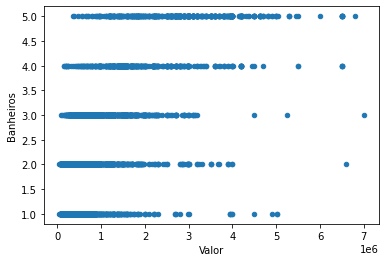

In [1497]:
df.plot(kind = 'scatter' , x='Valor' , y='Banheiros')

<AxesSubplot:xlabel='Valor', ylabel='Area'>

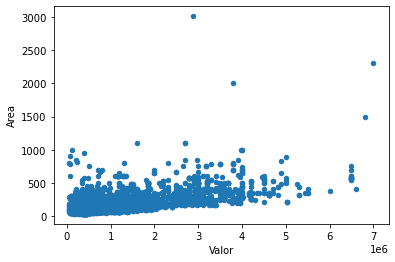

In [1498]:
df.plot(kind = 'scatter' , x='Valor' , y='Area')

In [1499]:
df.corr()

,Valor,Quartos,Banheiros,Vagas na garagem,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area,ValorPorM2,Area2
Valor,1.00,0.61,0.68,0.67,0.19,0.55,0.18,-0.31,0.64,0.55,0.69
Quartos,0.61,1.00,0.67,0.55,0.07,0.24,0.07,-0.13,0.59,0.11,0.70
Banheiros,0.68,0.67,1.00,0.55,0.11,0.36,0.12,-0.20,0.55,0.25,0.65
Vagas na garagem,0.67,0.55,0.55,1.00,0.09,0.33,0.09,-0.18,0.53,0.33,0.58
taxa_alfabetizacao,0.19,0.07,0.11,0.09,1.00,0.49,0.92,-0.92,-0.06,0.36,-0.06
salarioMedio,0.55,0.24,0.36,0.33,0.49,1.00,0.54,-0.68,0.23,0.52,0.25
taxa+1salario,0.18,0.07,0.12,0.09,0.92,0.54,1.00,-0.94,-0.08,0.39,-0.08
taxa-1salario,-0.31,-0.13,-0.20,-0.18,-0.92,-0.68,-0.94,1.00,-0.01,-0.45,-0.01
Area,0.64,0.59,0.55,0.53,-0.06,0.23,-0.08,-0.01,1.00,-0.09,0.96
ValorPorM2,0.55,0.11,0.25,0.33,0.36,0.52,0.39,-0.45,-0.09,1.00,-0.07


In [1500]:
df.drop(['ValorPorM2'], axis = 1 , inplace =True)

# Modelagem

### Pre Processamento

In [1501]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [1502]:
x_train, x_test, y_train ,y_test = train_test_split(df.drop('Valor', axis=1), df['Valor'], test_size= 0.2 , random_state=19)

#### Dummy categories

In [1503]:
encoderCategoria = OneHotEncoder()

In [1504]:
categories = encoderCategoria.fit_transform(x_train[['Categoria']])

In [1505]:
categories = pd.DataFrame(categories.toarray(), columns = encoderCategoria.get_feature_names_out(), index = x_train.index)

In [1506]:
x_train = x_train.join(categories).drop('Categoria', axis= 1)

In [1507]:
encoderRegiao = OneHotEncoder()

In [1508]:
regiao = encoderRegiao.fit_transform(x_train[['Regiao']])

In [1509]:
regiao = pd.DataFrame(regiao.toarray(), columns= encoderRegiao.get_feature_names_out(), index= x_train.index)

In [1510]:
x_train = x_train.join(regiao).drop('Regiao', axis = 1)

In [1511]:
encoderTipo = OneHotEncoder()

In [1512]:
tipo = encoderTipo.fit_transform(x_train[['TipoClasse']])

In [1513]:
tipo = pd.DataFrame(tipo.toarray() , columns= encoderTipo.get_feature_names_out(), index = x_train.index)

In [1514]:
x_train = x_train.join(tipo).drop('TipoClasse', axis = 1)

#### Normalizacao

In [1515]:
from sklearn.preprocessing import StandardScaler

In [1516]:
norm = StandardScaler()

In [1517]:
x_train['Area'] = norm.fit_transform(x_train[['Area']])

In [1518]:
norm2 = StandardScaler()

In [1519]:
x_train['Area2'] = norm2.fit_transform(x_train[['Area2']])

### Modelo

<AxesSubplot:>

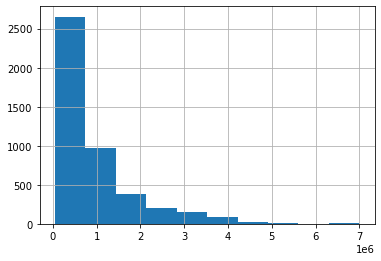

In [1520]:
y_train.hist()

In [1521]:
y_train = np.log2(y_train)

<AxesSubplot:>

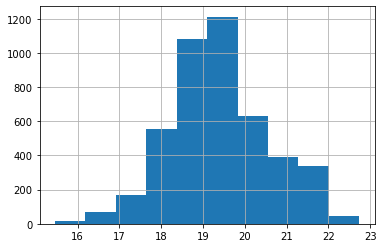

In [1522]:
y_train.hist()

In [1523]:
x_train = x_train.select_dtypes(include = np.number)

In [1524]:
from sklearn.linear_model import LinearRegression

In [1525]:
regressao = LinearRegression()

In [1526]:
regressao.fit(x_train, y_train)

LinearRegression()

In [1527]:
regressao.score(x_train, y_train)

0.7814824290715399

<AxesSubplot:xlabel='Valor', ylabel='Quartos'>

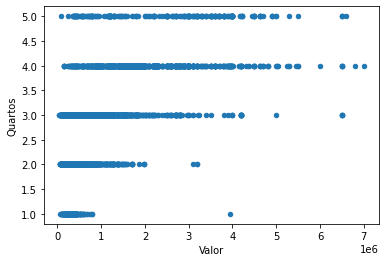

In [1528]:
df.plot(kind = 'scatter' , x='Valor' , y='Quartos')

In [1529]:
df.groupby('Quartos').mean()

,Valor,Banheiros,Vagas na garagem,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area,Area2
Quartos,,,,,,,,,
1,"344,144.93",1.06,0.93,99.06,"3,582.04",64.92,7.90,47.69,6.83
2,"484,519.35",1.64,1.16,98.81,"3,361.45",63.51,8.79,80.24,8.76
3,"775,296.79",2.26,1.65,99.02,"3,597.60",65.10,7.75,125.78,10.90
4,"1,949,889.47",3.60,2.63,99.20,"4,337.26",65.94,6.42,237.35,14.96
5,"2,490,508.98",4.25,2.98,98.81,"4,606.59",62.83,7.94,431.57,20.23


#### Validação

In [1530]:
categories = encoderCategoria.transform(x_test[['Categoria']])

In [1531]:
categories = pd.DataFrame(categories.toarray(), columns= encoderCategoria.get_feature_names_out(), index = x_test.index)

In [1532]:
x_test = x_test.join(categories).drop('Categoria', axis = 1)

In [1533]:
regioes = pd.DataFrame(encoderRegiao.transform(x_test[['Regiao']]).toarray() , columns = encoderRegiao.get_feature_names_out(), index =x_test.index)

In [1534]:
x_test = x_test.join(regioes).drop('Regiao', axis =1)

In [1535]:
tipo = pd.DataFrame(encoderTipo.transform(x_test[['TipoClasse']]).toarray() , columns = encoderTipo.get_feature_names_out(), index =x_test.index)

In [1536]:
x_test = x_test.join(tipo).drop(['Tipo','TipoClasse'], axis =1)

In [1537]:
x_test['Area'] = norm.transform(x_test[['Area']])

In [1538]:
x_test['Area2'] = norm2.transform(x_test[['Area2']])

In [1539]:
x_test = x_test.select_dtypes(include = np.number)
y_test = np.log2(y_test)

In [1540]:
regressao.score(x_test, y_test)

0.7816968085777999

In [1541]:
from sklearn.model_selection import cross_val_score

In [1542]:
testes = cross_val_score(regressao , x_train, y_train, cv = 100)

In [1543]:
[testes.mean()*100, testes.std()*100]

[76.59950241723004, 9.299951494265132]

In [1544]:
pd.Series(regressao.coef_  , index = x_train.columns).sort_values(ascending= False)

Area2                     0.58
Regiao_Zona Leste         0.54
Regiao_Jardim da Penha    0.32
Regiao_Jardim Camburi     0.32
Vagas na garagem          0.28
taxa_alfabetizacao        0.21
Quartos                   0.21
Categoria_Apartamentos    0.17
TipoClasse_Classe A       0.17
Regiao_Zona Norte         0.17
Banheiros                 0.15
Regiao_Jucutuquara        0.12
salarioMedio              0.00
taxa-1salario            -0.01
Regiao_Santo Antônio     -0.02
taxa+1salario            -0.02
TipoClasse_Classe B      -0.17
Categoria_Casas          -0.17
Regiao_Maruípe           -0.20
Area                     -0.28
Regiao_Zona Sul          -0.47
Regiao_Zona Oeste        -0.79
dtype: float64

In [1545]:
y_predict = regressao.predict(x_test)

In [1546]:
from sklearn.metrics import median_absolute_error, mean_squared_error, r2_score

In [1547]:
r2_score(y_test, y_predict)

0.7816968085777999

In [1548]:
y_predict2 = 2**y_predict

In [1549]:
y_test2 = 2**y_test

In [1550]:
median_absolute_error(y_test2, y_predict2) / y_test2.mean()

0.144396632232607

In [1551]:
median_absolute_error(y_test2, y_predict2)

142183.92906364775

In [1552]:
x_test.index

Int64Index([1504, 2730,  194, 1684,  230, 2430, 3078, 2971,  527, 5998,
            ...
            6351, 7369, 1293, 3983, 5896, 4237,  292, 6062, 2776, 5646],
           dtype='int64', length=1129)

In [1553]:
test = df.copy()

In [1554]:
x_test['previsao'] = y_predict2
test = df.join(x_test['previsao'], how= 'inner')

In [1555]:
test['erro'] = abs(test['Valor']-test['previsao'])

In [1556]:
test.groupby('Categoria')['erro'].median()

Categoria
Apartamentos   131,358.67
Casas          253,786.73
Name: erro, dtype: float64

In [1557]:
test['erro'].median()

142183.92906364787

<AxesSubplot:>

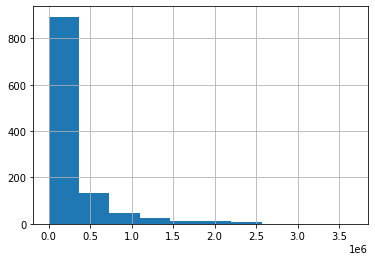

In [1558]:
test ['erro'].hist()

In [1564]:
test[test['erro']>1000000].sort_values(by = 'erro' , ascending = False)

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area,Regiao,TipoClasse,Area2,previsao,erro
2905,"5,020,900.00",Apartamentos,Venda - apartamento padrão,4,1,2,Praia do Canto,99.27,"5,849.47",68.74,5.00,217.00,Zona Leste,Classe B,14.73,"1,353,888.74","3,667,011.26"
2847,"3,950,000.00",Apartamentos,Venda - apartamento padrão,4,1,1,Praia do Canto,99.27,"5,849.47",68.74,5.00,190.00,Zona Leste,Classe B,13.78,"1,057,265.47","2,892,734.53"
3690,"5,300,000.00",Casas,Venda - casa em condominio fechado,4,5,3,Mata da Praia,99.63,"5,986.95",65.09,3.72,312.00,Jardim da Penha,Classe A,17.66,"2,812,440.58","2,487,559.42"
2882,"2,950,000.00",Apartamentos,Venda - apartamento padrão,5,5,5,Praia do Canto,99.27,"5,849.47",68.74,5.00,400.00,Zona Leste,Classe B,20.00,"5,400,616.02","2,450,616.02"
3578,"3,905,000.00",Casas,Venda - casa em rua pública,4,2,3,Mata da Praia,99.63,"5,986.95",65.09,3.72,266.00,Jardim da Penha,Classe B,16.31,"1,519,000.45","2,385,999.55"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,"2,200,000.00",Apartamentos,Venda - apartamento cobertura,5,4,2,Mata da Praia,99.63,"5,986.95",65.09,3.72,360.00,Jardim da Penha,Classe A,18.97,"3,244,329.03","1,044,329.03"
5648,"2,150,000.00",Apartamentos,Venda - apartamento padrão,3,3,2,Enseada do Suá,98.93,"4,856.07",66.64,7.41,147.00,Zona Leste,Classe B,12.12,"1,106,736.38","1,043,263.62"
1743,"1,500,000.00",Apartamentos,Venda - apartamento duplex/triplex,4,4,3,Jardim Camburi,99.40,"3,066.59",67.44,6.25,384.00,Jardim Camburi,Classe A,19.60,"2,521,176.00","1,021,176.00"
2511,"2,799,990.00",Casas,Venda - casa em rua pública,3,5,5,Ilha do Boi,98.24,"7,164.39",61.38,7.06,575.00,Zona Leste,Classe B,23.98,"3,815,288.50","1,015,298.50"


<AxesSubplot:>

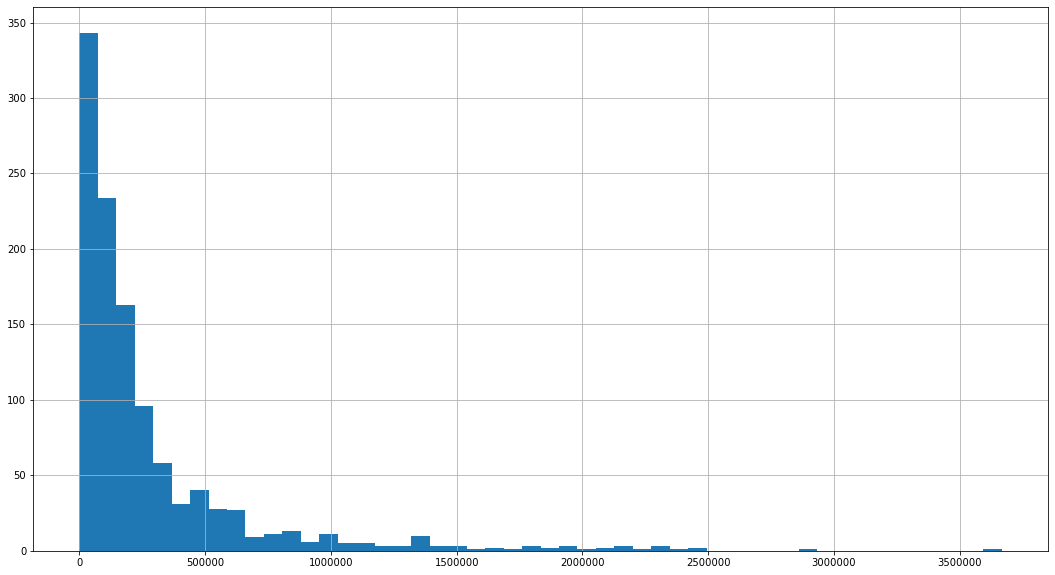

In [1560]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
test['erro'].hist(bins= 50)

